# Linear Regresion Model: Analysis of house prices


In [2]:
# IMPORT LIBS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### LOAD THE DATASET
we first load the dataset and make the next moves:
- `check null values`: this is really important to know which columns wont give us enough information
- `drop columns with high null-values rate`: if the null value rate is bigger than 5%, we drop the collumn because it wont give us enough information 

In [3]:
# LOAD DATASET
df = pd.read_csv("csv_files/01_original_data.csv")

In [14]:
# SEE PROPORTION OF NULL VALUES FOR EACH COLUMN THAT CONTAINS AT LEAST 1% NULL
null_percent = df.isnull().mean() * 100
null_columns = null_percent[null_percent > 0]
print(null_columns)

Series([], dtype: float64)


In [5]:
# TAKE COLUMNS WITH MORE THAN 5% NULL RATE AND SET NULL=0
cols_to_fill = df.columns[df.isnull().mean() >= 0.05]
df[cols_to_fill] = df[cols_to_fill].fillna(0)

### CLEAN THE DATASET
we need to take the data and transform it to a cleaner version, the final product must have a full numerical value dataset so that the model can understand it
- `binary values`: yes/no to 1/0
- `one-hot encoding`: nominal values will be replaced by similar binary values by the one-hot encoding method
- `replace remaining nulls with mean`: the remaining nulls we did not erase are going to be replaced by means

In [6]:
# BINARY VALUES
binary_map = {'Y': 1, 'N': 0}
df['CentralAir'] = df['CentralAir'].map(binary_map)
df['PavedDrive'] = df['PavedDrive'].map(binary_map)

In [7]:
# ONE-HOT ENCODING
df = pd.get_dummies(df, drop_first=True)

bool_columns = [col for col in df.columns if df[col].apply(lambda x: str(x) in ['True', 'False']).all()]
for col in bool_columns:
    df[col] = df[col].apply(lambda x: 1 if str(x) == 'True' or x is True else 0)

In [8]:
# REPLACE NULLS WITH MEAN
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in bool_columns]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [9]:
# VERIFY
print(df.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...               0               0   
1          1976         0.0         978  ...               0               0   
2          2002       162.0         486  ...               0               0   
3          1970         0.0         216  ...               0               0   
4          2000       350.0         655  ...               0               0   

   SaleType_New  SaleType_Oth  SaleTyp

### CORRELATION MATRIX
we now have a load of collumns, lets see which ones are the ones worth keeping
- `100% data`: too much data, unclear conclussions
- `15% data`: very high correlation with price, can give us clear conclussions. 31 collumns remaining

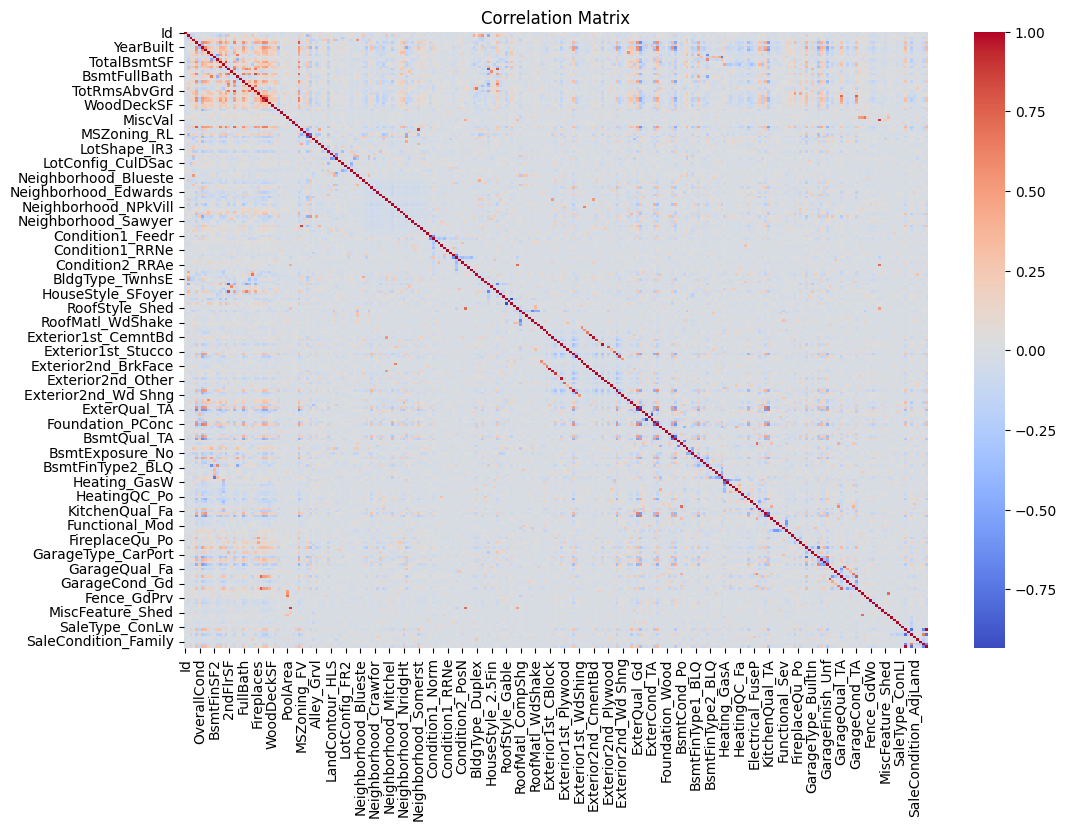

In [10]:
# SEE GENERAL CORRELATION MATRIX
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

# too much data, nothing usefull to be seen here

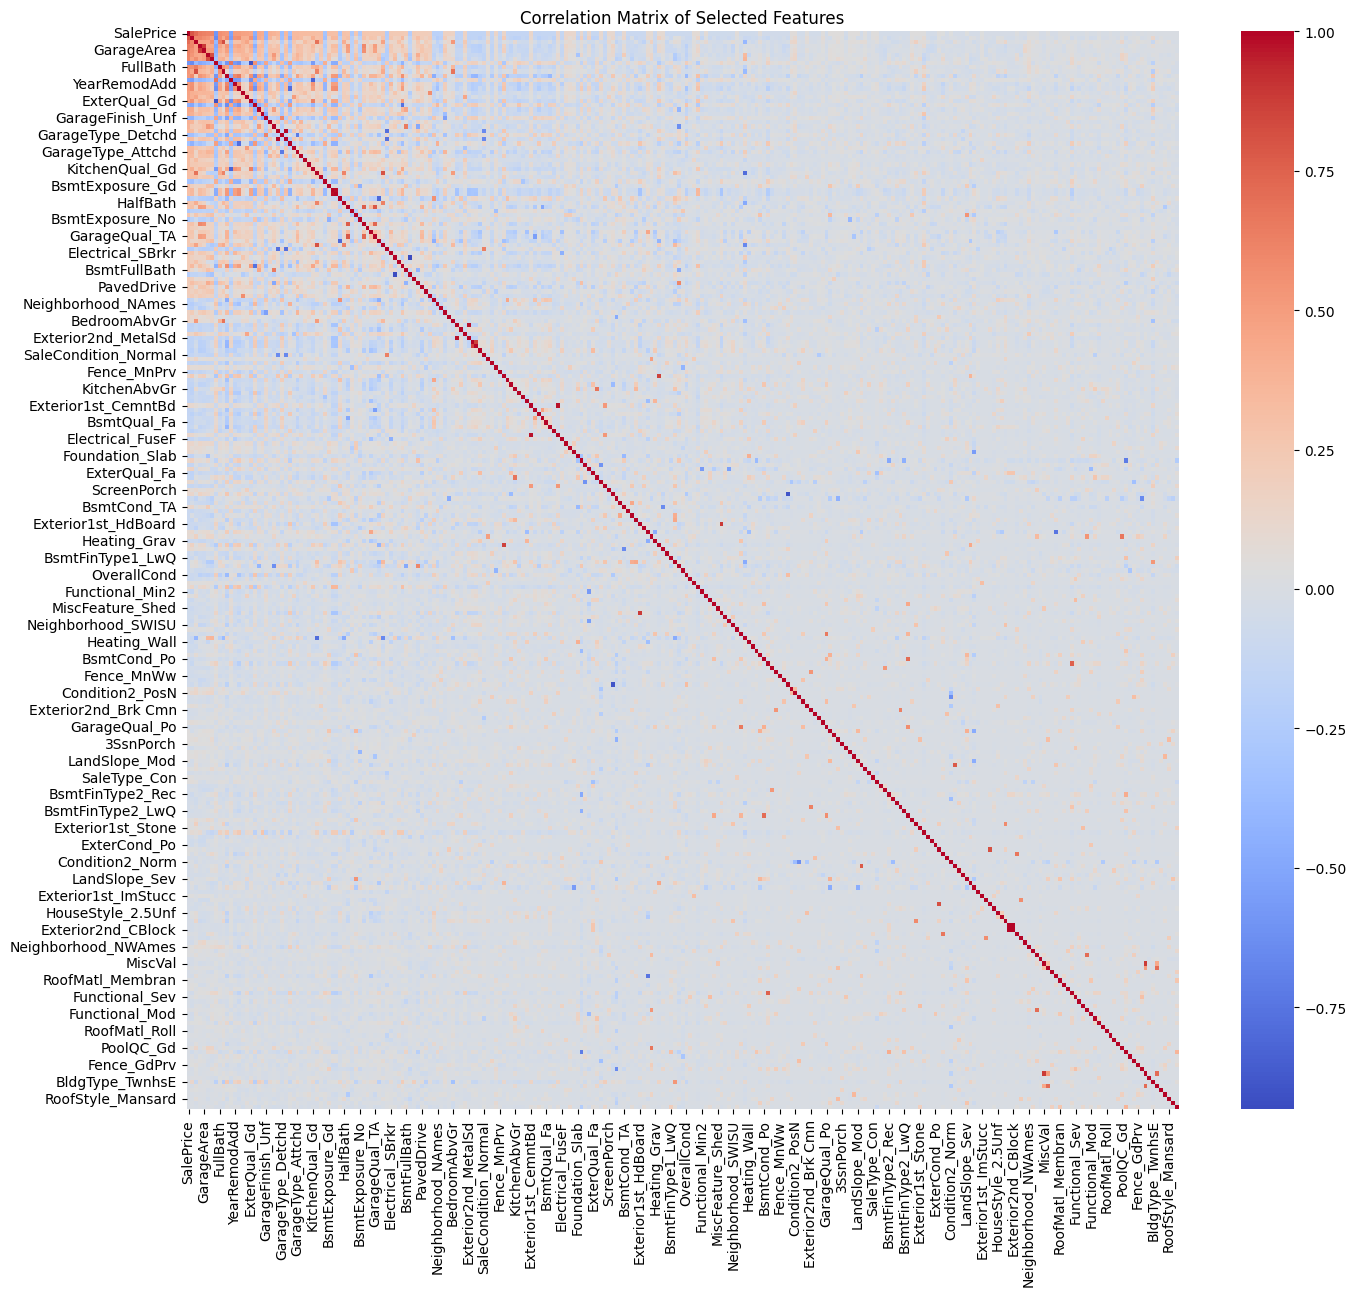

In [11]:
# TAKE HIGHEST 20% OF VARIABLES WITH HIGHER CORRELATION TO PRICE
corr_target = corr_matrix["SalePrice"].abs().sort_values(ascending=False)
selected_features = corr_target[:int(len(corr_target) * 1)].index.tolist()
df_filtered = df[selected_features]

plt.figure(figsize=(16, 14))
sns.heatmap(df_filtered.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [12]:
# VERIFY
print(df_filtered.head())

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  ExterQual_TA  FullBath  TotRmsAbvGrd  ...  RoofMatl_Tar&Grv  \
0       856             0         2             8  ...                 0   
1      1262             1         2             6  ...                 0   
2       920             0         2             6  ...                 0   
3       961             1         1             7  ...                 0   
4      1145             0         2             9  ...                 0   

   MiscFeature_Gar2  Condition1_RRNe  BldgType_TwnhsE  Condition2_RRAe  \
0     

In [13]:
# EXPORT TO CSV
df_filtered.to_csv("csv_files/02_filtered_data.csv", index=False)